In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [6]:
data[pd.isnull(data['height'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [12]:
print('для height пустых строк ' + str(len(data[pd.isnull(data['height'])])))
print('для weight пустых строк ' + str(len(data[pd.isnull(data['weight'])])))
print('для sport пустых строк ' + str(len(data[pd.isnull(data['sport'])])))
print('всего строк в наборе ' + str(len(data)))

для height пустых строк 330
для weight пустых строк 659
для sport пустых строк 0
всего строк в наборе 11538


In [17]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [18]:
data = data[pd.isnull(data['height']) == 0]
data = data[pd.isnull(data['weight']) == 0]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
features_columns = [c for c in data.columns if c != 'sex']

In [22]:
X = data[features_columns]

In [26]:
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [27]:
y = data['sex']

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [31]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [33]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [34]:
le.fit(data['sex'])

LabelEncoder()

In [36]:
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [37]:
model = LogisticRegression()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
from sklearn.metrics import roc_curve

In [41]:
predictions = model.predict_proba(X_test)

In [47]:
fpr, tpr, thres = roc_curve(y_test, predictions[:,1])

In [43]:
from matplotlib import pyplot as plt

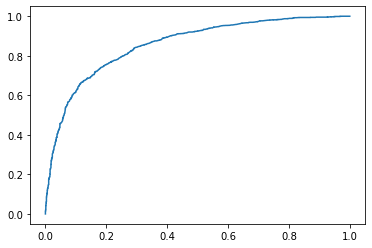

In [44]:
plt.plot(fpr, tpr)

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_test, predictions[:,1])

0.857174462885344

In [65]:
tp = 0
fp = 0
fn = 0
tn = 0

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:,1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    if predicted ==1:
        if actual == 1:
            tp += 1
        else:
            fp +=1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
        

In [66]:
(tp + tn)/(tp + tn + fp + fn)

0.7744014732965009

In [68]:
precision = tp/(tp + fp)
precision

0.7932801822323462

In [70]:
from sklearn.metrics import precision_recall_curve

In [72]:
pr, re, thres = precision_recall_curve(y_test, predictions[:,1])

In [73]:
for line in zip(pr, re, thres):
    print(line)

(0.5489891135303266, 1.0, 0.052089638272180175)
(0.5488487865588052, 0.9994334277620397, 0.052257830873694455)
(0.5490196078431373, 0.9994334277620397, 0.05301088722432163)
(0.5493615696044846, 0.9994334277620397, 0.053043746264365005)
(0.549703957619196, 0.9994334277620397, 0.05313229285760515)
(0.5498753117206983, 0.9994334277620397, 0.05336296038862073)
(0.5497349547864048, 0.9988668555240793, 0.054615362888922596)
(0.549906425452277, 0.9988668555240793, 0.05540040632789649)
(0.5500780031201248, 0.9988668555240793, 0.056015944554592655)
(0.5502496878901373, 0.9988668555240793, 0.056230779401073946)
(0.5504214798626288, 0.9988668555240793, 0.05707284658657704)
(0.5505933791380387, 0.9988668555240793, 0.057108071613549825)
(0.5511097217880587, 0.9988668555240793, 0.057926749911519484)
(0.5514544885830466, 0.9988668555240793, 0.05853254722946727)
(0.5516270337922403, 0.9988668555240793, 0.0587926324437706)
(0.5519724483406387, 0.9988668555240793, 0.06029350594097189)
(0.552145317882868

In [74]:
from sklearn.metrics import average_precision_score

In [75]:
average_precision_score(y_test, predictions[:,1])

0.8704228737483769